In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv of data
body_df = pd.read_csv("body_performance.csv")

In [3]:
# preview the dataframe
body_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


The dataset has 13,393 records and 12 attributes.

## Pre-processing

First, we'll check for any missing values. 

In [4]:
# check for any missing values
body_df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

There are no missing values in our dataset!

We'll check for any duplicate records next.

In [5]:
# check for duplicates
duplicate = body_df[body_df.duplicated()]
duplicate

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
12473,27.0,F,157.0,49.1,30.7,70.0,86.0,27.7,19.7,51.0,167.0,A


The dataset has one duplicate record so we will keep the first occurrence and drop the unneeded record

In [6]:
# remove duplicate records
body_df.drop_duplicates(inplace = True)

In [7]:
# again check for any remaining duplicates
duplicate = body_df[body_df.duplicated()]
duplicate

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class


Now that there are no duplicates, we'll move onto evaluating our dataset now.

In [8]:
# find the datatype of each attribute
body_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13392 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13392 non-null  float64
 1   gender                   13392 non-null  object 
 2   height_cm                13392 non-null  float64
 3   weight_kg                13392 non-null  float64
 4   body fat_%               13392 non-null  float64
 5   diastolic                13392 non-null  float64
 6   systolic                 13392 non-null  float64
 7   gripForce                13392 non-null  float64
 8   sit and bend forward_cm  13392 non-null  float64
 9   sit-ups counts           13392 non-null  float64
 10  broad jump_cm            13392 non-null  float64
 11  class                    13392 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.3+ MB


The dataset has 10 float and 2 object columns.

As we can see, there are eleven factors in our data for the body performance grade that is shown in 'class'
- 7 of the features are physical body attributes and the rest are types of exercises 

All features except for 'gender' and 'class' are 'float' type. 

I then made the 'gender' and 'class' categories numerical values, instead of objects, to make the data uniform for our analysis

In [9]:
# replace gender
body_df.replace("M", 0 , inplace = True)
body_df.replace("F", 1 , inplace = True)

In [10]:
# replace class
body_df.replace("A", 0 , inplace = True)
body_df.replace("B", 1 , inplace = True)
body_df.replace("C", 2 , inplace = True)
body_df.replace("D", 3 , inplace = True)

In [11]:
# preview of new dataframe
body_df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3


Let's look to see if our classes are balanced.

In [121]:
body_df["class"].value_counts()

2    3349
3    3349
0    3347
1    3347
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

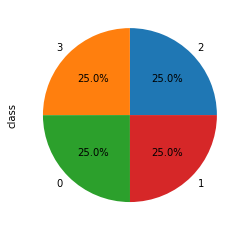

In [119]:
#Classes Distribution
round(body_df['class'].value_counts()/body_df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

The 4 classes are equally distributed

We will now make a correlation matrix to see the relationships of all of the features.

<AxesSubplot:>

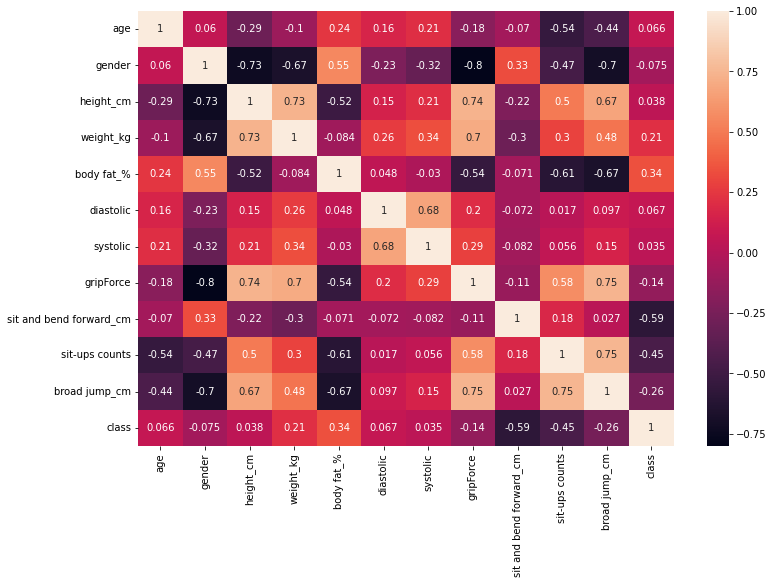

In [12]:
# correlation matrix
plt.figure(figsize = (12,8))
sns.heatmap(body_df.corr(), annot = True)

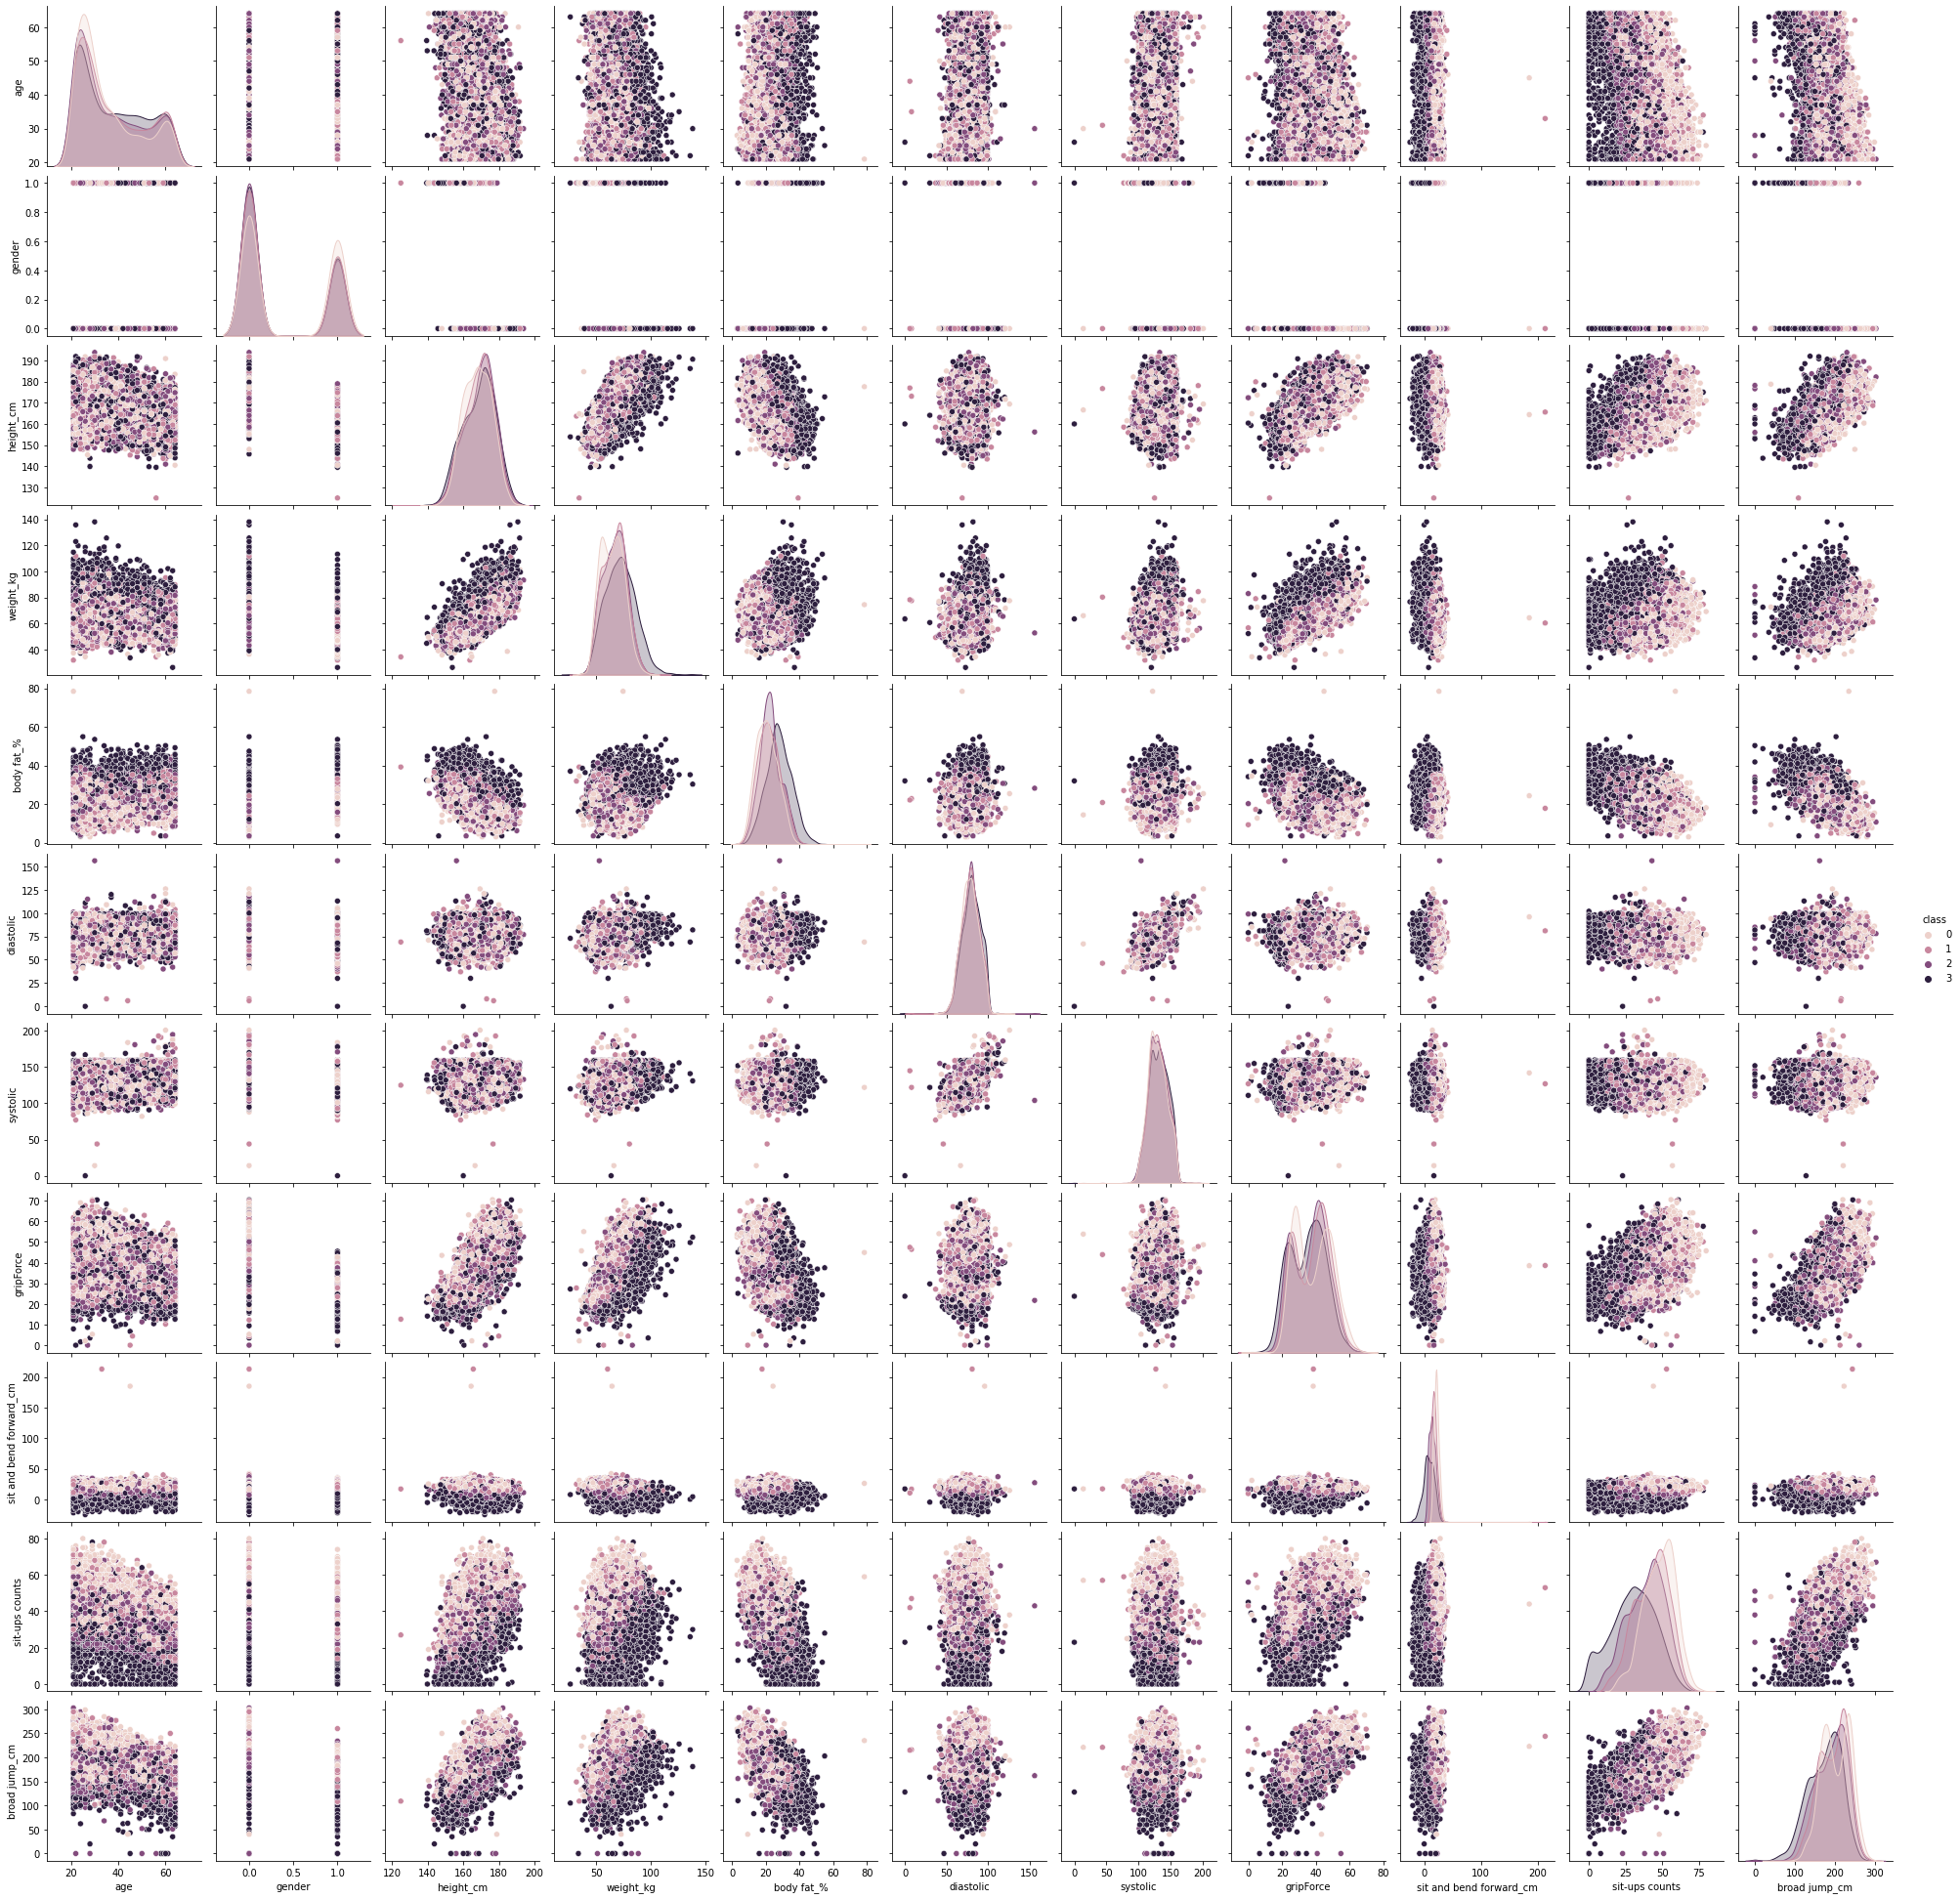

In [13]:
sns.pairplot(body_df, hue = 'class')

It's interesting to see how little correlation there is between the features with the body performance. Nonetheless, there are some conclusions that can be made:
- Age and sit-ups counts are negatively correlated as well as age and broad jump, meaning that younger individuals can do more sit-ups and jump further than older individuals.
- There is a correlation between the variables like height/weight and gender.
- There is a negative correlation between bodyfat and other variables (grip strength, sit-ups, broad jump), which means that individuals with less fat tend to do more, sit-ups, broad jumps, and have higher grip strength.
- Diastolic and systolic have a positive correlation but as a surprise, we have little correlation between bodyfat and blood pressure.

After these conclusions, I decided to look more into factors that I believed could have some impact on body performance: Age, Gender, and Weight

### Age

We would think that as we age, phyical capacities would start to diminish which means that there would be more of a correlation between age and body performance. Nevertheless, in our data it is not clearly shown. Let's investigate why.

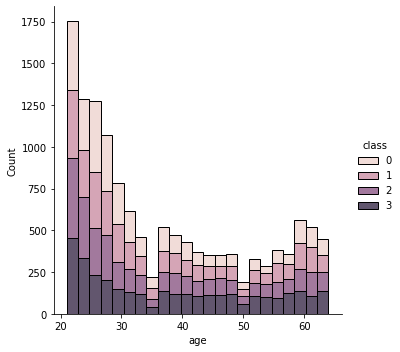

In [14]:
# distribution of people and age
sns.displot(body_df, x = 'age', hue = 'class', multiple = "stack")

There are more people in their 20's than other group ages in our data which might explain our lack of correlation with body performance.

We can see that in most age-groups, there is no clear leading class, however, there are some exceptions.

We might see it better if we group our data by decades (20's, 30's, 40's, etc)

In [15]:
decade = body_df.groupby(body_df['age']//10*10)
decade['class'].value_counts(sort = True)

age   class
20.0  0        1583
      2        1482
      1        1410
      3        1315
30.0  0         743
      1         703
      2         619
      3         597
40.0  3         571
      2         476
      1         433
      0         386
50.0  3         542
      2         446
      1         433
      0         321
60.0  1         368
      2         326
      3         324
      0         314
Name: class, dtype: int64

People in their 20's and 30's can be seen to be in a higher performance class than the rest, which is not surprising to see.

However, it is surprising that people in their 60's tend to be in a better shape than those in their 40's and 50's, but we must not forget to consider there are less people in their 60's in our dataset.

### Gender

<AxesSubplot:ylabel='gender'>

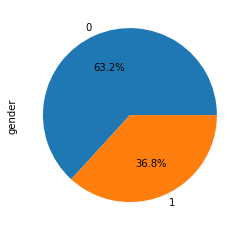

In [16]:
# gender distribution
round(body_df['gender'].value_counts()/body_df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

In [17]:
body_df.gender.value_counts()

0    8467
1    4925
Name: gender, dtype: int64

There are more men than women in our dataset

### Age and Gender

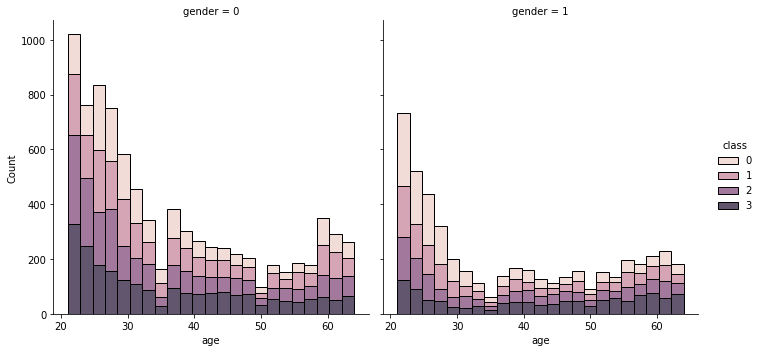

In [18]:
sns.displot(data=body_df, x="age", hue="class", col="gender", multiple="stack")

Since there are more males than females, I seperated the classes by age. 

Females in their early 20's tend to perform better than males at that same age. 

On the other hand, when both males and females are about 60 years old, men tend to show better performance. 

In the 30 - 60 range, they tend to behave pretty much the same with some exceptions.

### Weight


Average weight: 67 kg



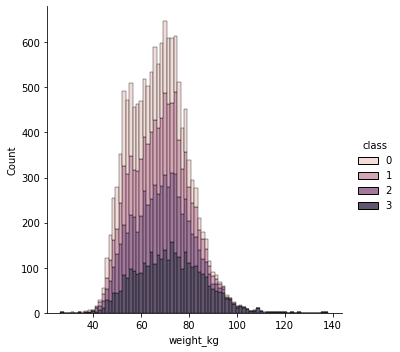

In [19]:
sns.displot(data=body_df, x="weight_kg", hue="class", multiple="stack")

print('\nAverage weight: {:.0f} kg\n'.format(body_df['weight_kg'].mean()))

It appears that the lightest and heaviest individuals have lower body performance class grades. 

### Weight and Body Fat Percentage

I wanted to look more into weight and body fat percentage because muscle does weigh more than fat. 

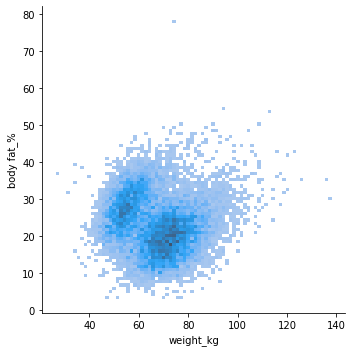

In [22]:
sns.displot(data=body_df, x="weight_kg", y='body fat_%')

There are people with relatively low fat percentage and have higher weight. On the other hand, we can see people with lower weight and higher fat percentage. 

## Modeling

Since our data is a pretty large set and has little correlation with the features and the grades of body performance, I believe that the Random Forest model may be the best fit. 

In [105]:
import sklearn

In [106]:
# separate target and features
X = body_df.drop("class" , axis = 1)
y = body_df['class']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10713, 11)
(10713,)
(2679, 11)
(2679,)


In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)

RandomForestClassifier()

## Evaluate Model

In [111]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [112]:
y_pred = randomforest.predict(X_test)

In [113]:
# accuracy score
accuracy_score(y_pred, y_test)

0.7323628219484882

In [114]:
# classification report
class_names = ['Class A', 'Class B', 'Class C', 'Class D']
print(classification_report(y_test, y_pred, target_names = class_names))

              precision    recall  f1-score   support

     Class A       0.73      0.85      0.79       674
     Class B       0.62      0.58      0.60       679
     Class C       0.70      0.68      0.69       657
     Class D       0.88      0.81      0.84       669

    accuracy                           0.73      2679
   macro avg       0.73      0.73      0.73      2679
weighted avg       0.73      0.73      0.73      2679



<AxesSubplot:>

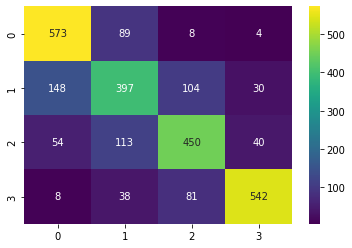

In [115]:
# confusion matrix 
matrix_rf = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(matrix_rf, annot = True, fmt = ".0f", cmap = 'viridis')